# Задния из методички


In [ ]:
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
import numpy as np
from sklearn.svm import SVC
X, y = make_blobs(n_features=2, n_samples=30, centers=2, random_state=5, cluster_std=0.4)

In [ ]:
def plot_decision_regions(X, y, model):
    plt.scatter(model.support_vectors_[:, 0],model.support_vectors_[:, 1], linewidth=7, facecolors='green')

    plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
    plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

    X0 = np.linspace(X[:, 0].min(),X[:, 0].max(), X.shape[0])
    X1 = np.linspace(X[:, 1].min(),X[:, 1].max(), X.shape[0])

    X0_grid, X1_grid = np.meshgrid(X0, X1)
    Z = model.decision_function(np.array([X0_grid.ravel(), X1_grid.ravel()]).T).reshape(X0_grid.shape)
    plt.contour(X0_grid, X1_grid, Z, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', '--'])
    plt.contourf(X0_grid, X1_grid, Z, colors='k', levels=[-1, 0, 1], alpha=0.5)

    plt.title("Диаграмма рассеяния c линией разделения и зазором")
    plt.xlabel('X0')
    plt.ylabel('X1')
    plt.show()

# Самостоятельная работа

1. В первом задании поэкспериментируйте с различными значениями аргумента C класса SVC. Сделайте вывод о том, как он влияет на модель классификации.

In [ ]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_features=2, n_samples=30, centers=2, random_state=5, cluster_std=0.4)

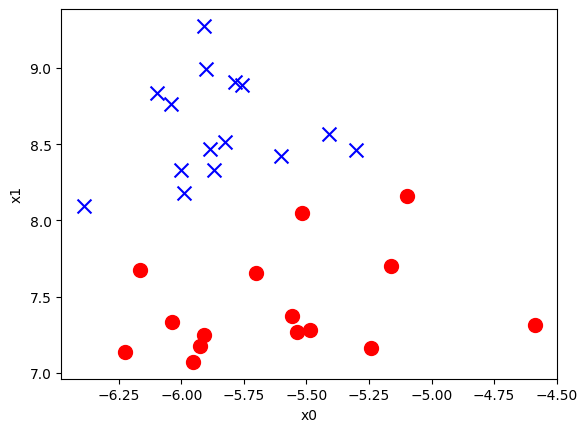

In [ ]:
from matplotlib import pyplot as plt
plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)
plt.xlabel('x0')
plt.ylabel('x1')
plt.show()

In [ ]:
from sklearn.svm import SVC
svm_linear = SVC(kernel='linear', C=100)
svm_linear.fit(X, y)

SVC(C=100, kernel='linear')

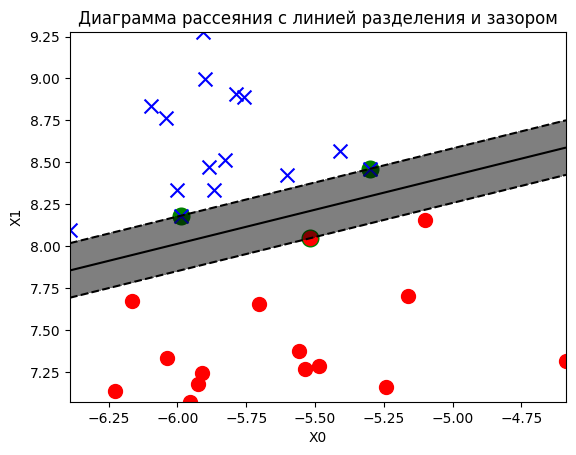

In [ ]:
plot_decision_regions(X, y, svm_linear)

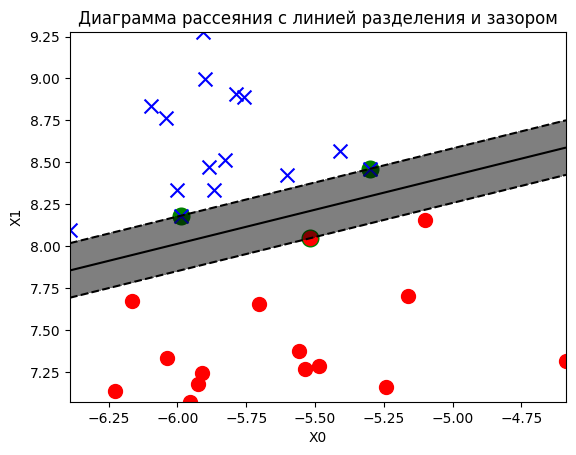

In [ ]:
svm_linear2 = SVC(kernel='linear', C=1000)
svm_linear2.fit(X, y)
plot_decision_regions(X, y, svm_linear2)

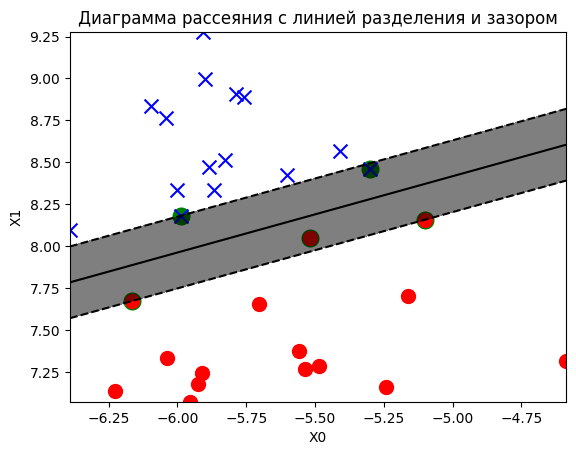

In [ ]:
svm_linear3 = SVC(kernel='linear', C=10)
svm_linear3.fit(X, y)
plot_decision_regions(X, y, svm_linear3)

чем меньше C тем шире полоса, но больше число нарушений зазора, а чем больше C, тем более жёсткий зазор
чем больше с тем модель более чувствительна к  выбросам


2. В первом задании подвигайте точку нового предсказания. Убедитесь, что с другой стороны границы предсказывается другой класс. Как изменяется предсказание, если точка ляжет внутрь полосы зазора?

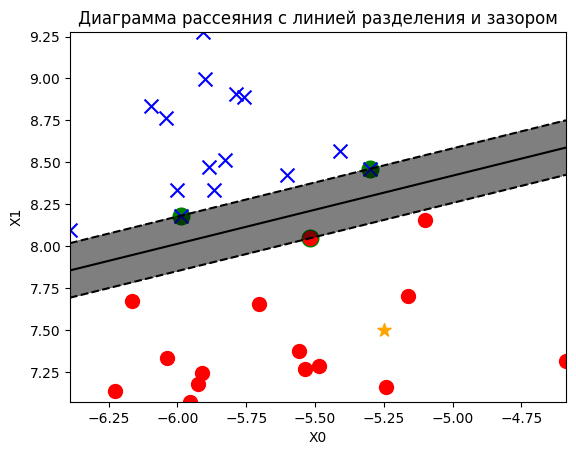

In [ ]:
observation_new = [[-5.25, 7.5]]
plt.scatter(observation_new[0][0], observation_new[0][1], marker='*', s=100, color='orange')
plot_decision_regions(X, y, svm_linear)

In [ ]:
print(svm_linear.decision_function(observation_new), svm_linear.predict(observation_new))

[-5.03131797] [0]


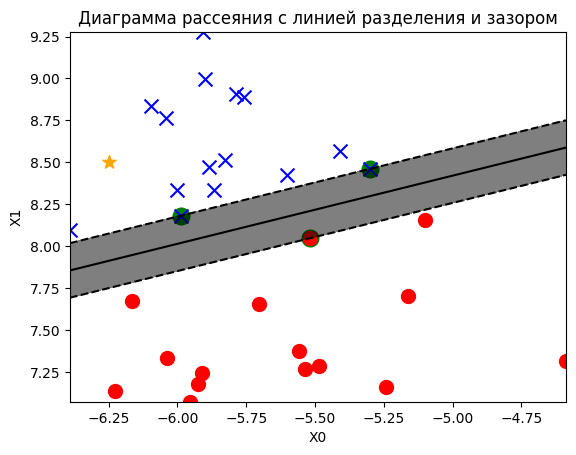

In [ ]:
observation_new = [[-6.25, 8.5]]
plt.scatter(observation_new[0][0], observation_new[0][1], marker='*', s=100, color='orange')
plot_decision_regions(X, y, svm_linear)

In [ ]:
print(svm_linear.decision_function(observation_new), svm_linear.predict(observation_new))

[3.61472185] [1]


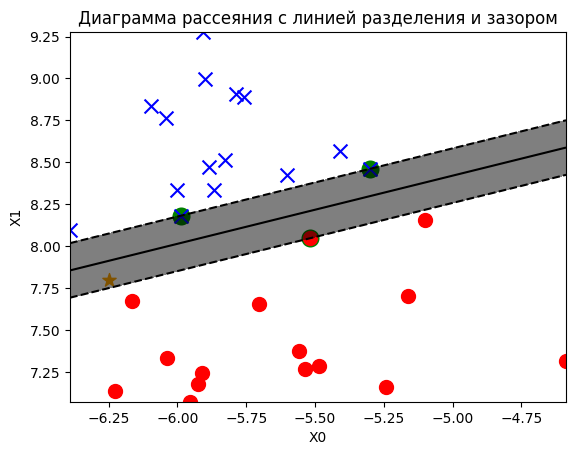

In [ ]:
observation_new = [[-6.25, 7.8]]
plt.scatter(observation_new[0][0], observation_new[0][1], marker='*', s=100, color='orange')
plot_decision_regions(X, y, svm_linear)

In [ ]:
print(svm_linear.decision_function(observation_new), svm_linear.predict(observation_new))

[-0.68806047] [0]


3. Во втором задании повторите анализ с методом опорных векторов с другими видами ядер. Сравните вид границы принятия решения и показатели точности модели.

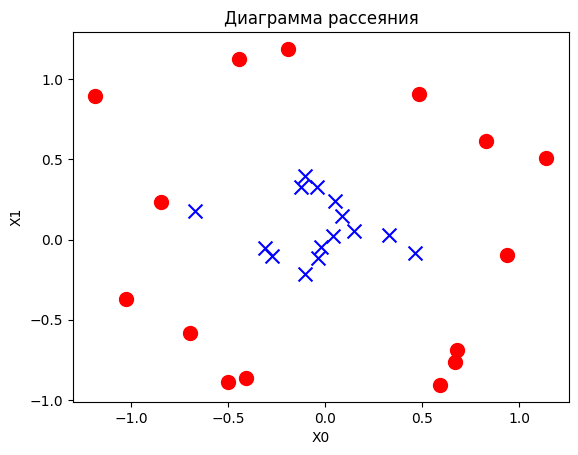

In [ ]:
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=30, random_state=5, factor=.1, noise=.2)
plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)
plt.title("Диаграмма рассеяния")
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

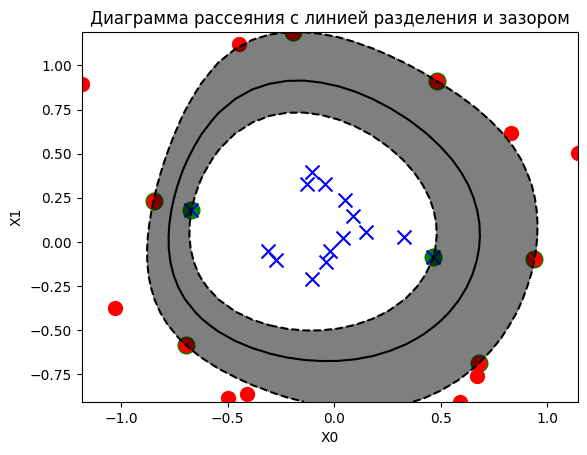

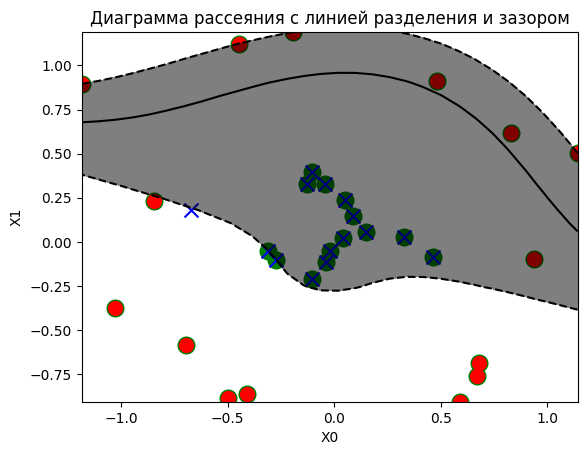

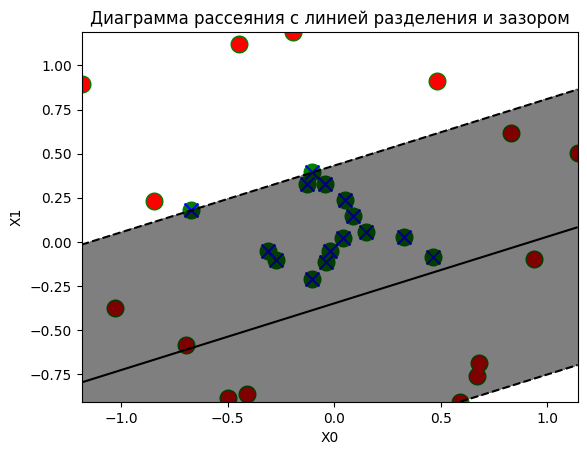

In [ ]:


# svm_rbf = SVC(kernel='rbf', C=1000).fit(X, y)
# svm_poly = SVC(kernel='poly', C=150).fit(X, y)


svm_rbf = SVC(kernel='rbf', C=100).fit(X, y)
svm_poly = SVC(kernel='poly', C=100).fit(X, y)
svm_linear = SVC(kernel='linear', C=100).fit(X, y)

plot_decision_regions(X, y, svm_rbf)
plot_decision_regions(X, y, svm_poly)
plot_decision_regions(X, y, svm_linear)


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
print(f'точность линейного ядра {accuracy_score(y, svm_linear.predict(X))}')
print(f'точность полиномиального ядра {accuracy_score(y, svm_poly.predict(X))}')
print(f'точность радиольного базисного ядра {accuracy_score(y, svm_rbf.predict(X))}')


точность линейного ядра 0.7
точность полиномиального ядра 0.7
точность радиольного базисного ядра 1.0


Вывод:

Для этого набора данных больше все подходит радиальное базисное ядро


4. В третьем задании поэкспериментируйте со значением аргумента C. Сделайтевывод о том, как он влияет на модель.

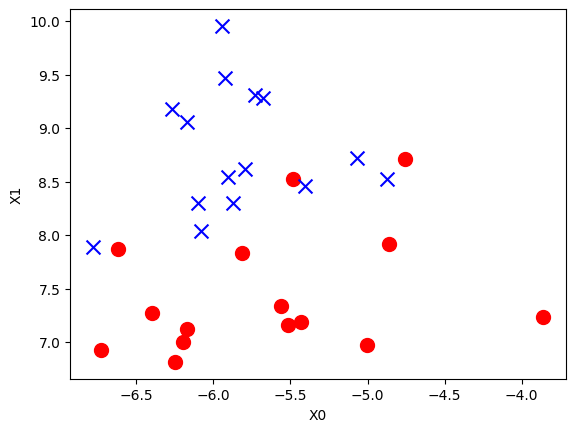

In [ ]:

X, y = make_blobs(n_features=2, n_samples=30, centers=2, random_state=5, cluster_std=0.7)

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)








plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

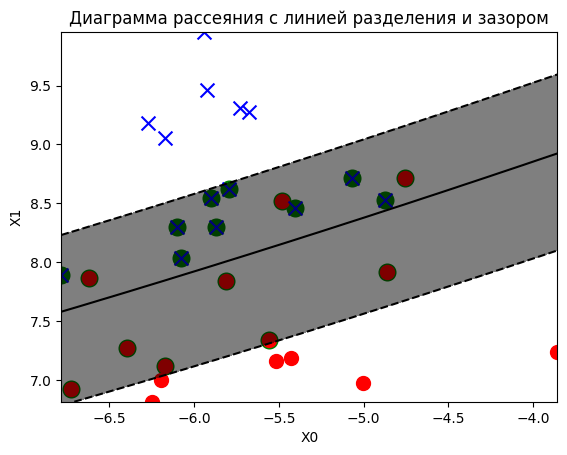

In [ ]:
svm_poly = SVC(kernel='poly', degree=4, C=2).fit(X, y)
plot_decision_regions(X, y, svm_poly)

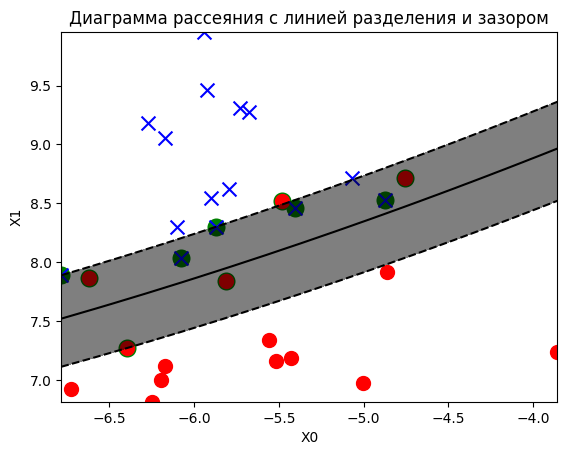

In [ ]:
svm_poly2 = SVC(kernel='poly', degree=4, C=100).fit(X, y)
plot_decision_regions(X, y, svm_poly2)

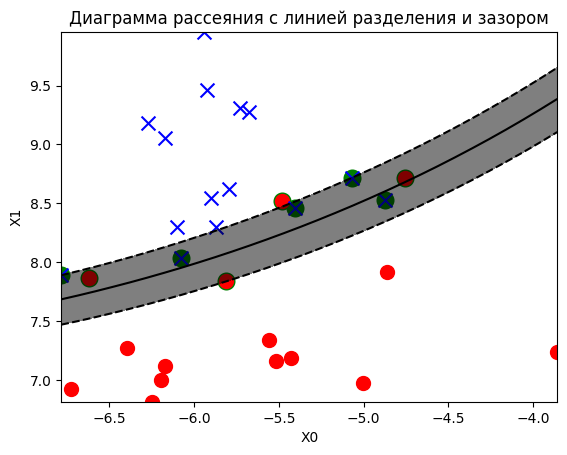

In [ ]:
svm_poly3 = SVC(kernel='poly', degree=4, C=1000).fit(X, y)
plot_decision_regions(X, y, svm_poly3)

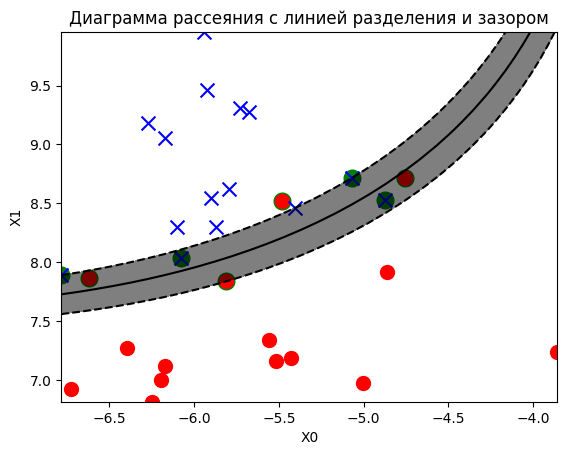

In [ ]:
svm_poly4 = SVC(kernel='poly', degree=4, C=50000).fit(X, y)
plot_decision_regions(X, y, svm_poly4)

Вывод:

Чем больше С, тем более жёсткое деление на классы данных


5. В третьем задании примените классификатор без ядра. Познакомьтесь и примените класс Linear_SVC.

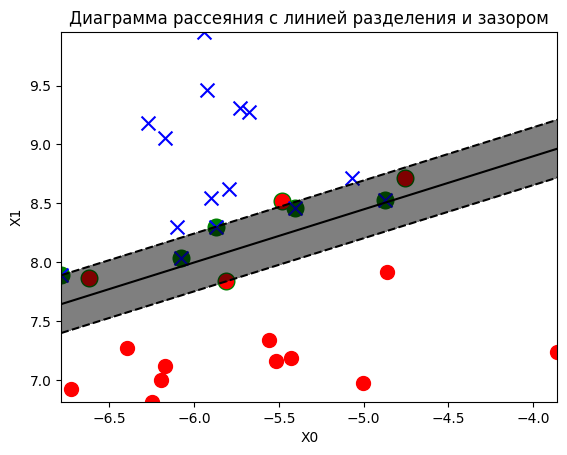

In [ ]:
svm_linear = SVC(kernel='linear',  C=150).fit(X, y)
plot_decision_regions(X, y, svm_linear)

In [ ]:
from sklearn.svm import LinearSVC

linearSVC = LinearSVC(C = 100).fit(X, y)

print(f' svm_poly  {accuracy_score(y, svm_poly.predict(X))}')
print(f' LinearSVC {accuracy_score(y, linearSVC.predict(X))}')

 svm_poly  0.9
 LinearSVC 0.6


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


6. Сгенерируйте датасет для классификации из 1000 точек и 5 атрибутов. Попробуйте применить метод опорных векторов на нем. Найдите методом подбора наилучшее ядро и значение С.

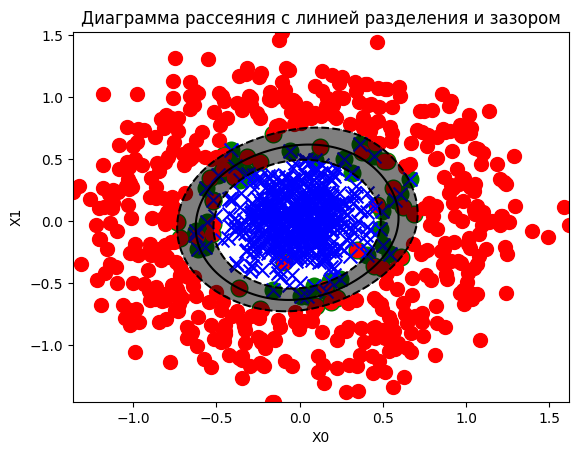

In [ ]:



X, y = make_circles(n_samples=1000, random_state=5, factor=.1, noise=.2)




svm_rbf = SVC(kernel='rbf', C=10).fit(X, y)


plot_decision_regions(X, y, svm_rbf)


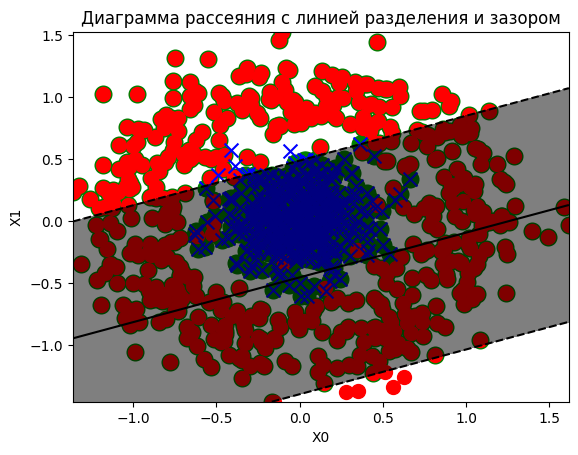

In [ ]:
svm_linear = SVC(kernel='linear', C=10).fit(X, y)


plot_decision_regions(X, y, svm_linear)

Вывод: с такими даннами лучше использовать Радиальное базисное ядро

7. Попробуйте данную модель с большим количеством точек. На каком количестве обучение начинает занимать существенное время?

In [ ]:
X, y = make_circles(n_samples=10000, random_state=5, factor=.1, noise=.2)

svm_rbf = SVC(kernel='rbf', C=10).fit(X, y)






plot_decision_regions(X, y, svm_rbf)

n_samples = 10 000 занимает много времени и озу

8. Примените метод опорных векторов для задачи множественной классификации. Самостоятельно сгенерируйте визуализируемый датасет для этой задачи. Поробуйте изобразить границу принятия решений и зазор.

In [ ]:
def plot_decision_boundary(X, y, model):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k', s=30)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

    plt.show()

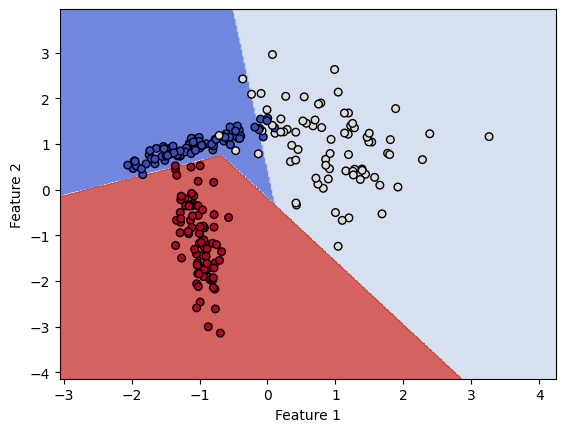

Точность: 0.90


In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV

X, y = datasets.make_classification(n_samples=300, n_features=2, n_informative=2,
                                    n_redundant=0, n_classes=3, n_clusters_per_class=1,
                                    random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm_model = SVC(kernel='linear', C=10)
svm_model.fit(X_train, y_train)

plot_decision_boundary(X_train, y_train, svm_model)

accuracy = svm_model.score(X_test, y_test)
print(f"Точность: {accuracy:.2f}")


9. Выберите из библиотеки sklearn готовый датасет для классификации и попробуйте смоделировать его при помощи метода опорных векторов.


In [ ]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm_model_iris = SVC(kernel='linear', C=1)
svm_model_iris.fit(X_train, y_train)

y_pred = svm_model_iris.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Точность {accuracy:.2f}")
print("Матрица ошибок:")
print(conf_matrix)

Точность 1.00
Матрица ошибок:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


10. Повторите такой же анализ для задачи регрессии и соответствующего датасета.

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.svm import SVR
from sklearn.metrics import r2_score

california_housing = fetch_california_housing()
X_regression = california_housing.data
y_regression = california_housing.target

X_train_regression, X_test_regression, y_train_regression, y_test_regression = train_test_split(
    X_regression, y_regression, test_size=0.2, random_state=42
)
svm_model_regression_california = SVR(kernel='linear', C=1)
svm_model_regression_california.fit(X_train_regression, y_train_regression)

y_pred_regression_california = svm_model_regression_california.predict(X_test_regression)


r2_california = r2_score(y_test_regression, y_pred_regression_california)

print(f"коэффициент детерминации  {r2_california:.2f}")

коэффициент детерминации  0.10
